We have two data sets where two groups of users are exposed to two slightly different versions of the same app/site/product. 
The users belonging to the control group are exposed to the 'original' version of the product, while users in test group are exposed to  modified version of the product.

The goal of the A/B test is to find out whether the exposure to a different version of the product (test version) with respect to the original one (control version) determines a change in the users behavior (their number of purchases, clicks, impressions etc.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import shapiro

from warnings import simplefilter
simplefilter("ignore")

Data in control and test group are in single column and they are separated by semicolons so we need to sort the data into columns.

In [2]:
control_group = pd.read_csv('control_group.csv')
control_group.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


In [3]:
columns_list = control_group.columns[0].split(';')

data = list(control_group["Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase"].apply(lambda x: x.split(';')))
data

[['Control Campaign',
  '1.08.2019',
  '2280',
  '82702',
  '56930',
  '7016',
  '2290',
  '2159',
  '1819',
  '618'],
 ['Control Campaign',
  '2.08.2019',
  '1757',
  '121040',
  '102513',
  '8110',
  '2033',
  '1841',
  '1219',
  '511'],
 ['Control Campaign',
  '3.08.2019',
  '2343',
  '131711',
  '110862',
  '6508',
  '1737',
  '1549',
  '1134',
  '372'],
 ['Control Campaign',
  '4.08.2019',
  '1940',
  '72878',
  '61235',
  '3065',
  '1042',
  '982',
  '1183',
  '340'],
 ['Control Campaign', '5.08.2019', '1835', '', '', '', '', '', '', ''],
 ['Control Campaign',
  '6.08.2019',
  '3083',
  '109076',
  '87998',
  '4028',
  '1709',
  '1249',
  '784',
  '764'],
 ['Control Campaign',
  '7.08.2019',
  '2544',
  '142123',
  '127852',
  '2640',
  '1388',
  '1106',
  '1166',
  '499'],
 ['Control Campaign',
  '8.08.2019',
  '1900',
  '90939',
  '65217',
  '7260',
  '3047',
  '2746',
  '930',
  '462'],
 ['Control Campaign',
  '9.08.2019',
  '2813',
  '121332',
  '94896',
  '6198',
  '2487',
 

In [4]:
columns_list

['Campaign Name',
 'Date',
 'Spend [USD]',
 '# of Impressions',
 'Reach',
 '# of Website Clicks',
 '# of Searches',
 '# of View Content',
 '# of Add to Cart',
 '# of Purchase']

We want to see are they any missing values in dataset.

In [6]:
control_group.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [5]:
control_group=pd.DataFrame(data,columns=columns_list)
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [7]:
print(f"The number of missing values is: {control_group.isnull().sum().sum()}")

The number of missing values is: 0


In [8]:
print(f'The number of duplicated valuse is: {control_group.duplicated().sum()}')

The number of duplicated valuse is: 0


We would like to check type of data in dataset (because we can see in missing values in 4th row).

In [9]:
control_group.iloc[4].apply(type)

Campaign Name          <class 'str'>
Date                   <class 'str'>
Spend [USD]            <class 'str'>
# of Impressions       <class 'str'>
Reach                  <class 'str'>
# of Website Clicks    <class 'str'>
# of Searches          <class 'str'>
# of View Content      <class 'str'>
# of Add to Cart       <class 'str'>
# of Purchase          <class 'str'>
Name: 4, dtype: object

In [10]:
control_group['Date']=pd.to_datetime(control_group['Date'],format='%d.%m.%Y')
control_group.head(1)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618


We see data type is string we need to change them in integers.

In [11]:
control_group['Spend [USD]']=control_group['Spend [USD]'].apply(lambda x: int(x) if x !='' else 0)
control_group['# of Impressions']=control_group['# of Impressions'].apply(lambda x: int(x) if x !='' else 0)
control_group['Reach']=control_group['Reach'].apply(lambda x: int(x) if x !='' else 0)
control_group['# of Website Clicks']=control_group['# of Website Clicks'].apply(lambda x: int(x) if x !='' else 0)
control_group['# of Searches']=control_group['# of Searches'].apply(lambda x: int(x) if x !='' else 0)
control_group['# of View Content']=control_group['# of View Content'].apply(lambda x: int(x) if x !='' else 0)
control_group['# of Add to Cart']=control_group['# of Add to Cart'].apply(lambda x: int(x) if x !='' else 0)
control_group['# of Purchase']=control_group['# of Purchase'].apply(lambda x: int(x) if x !='' else 0)

In [12]:
control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-05,1835,0,0,0,0,0,0,0


In [13]:
test_group=pd.read_csv('test_group.csv')
test_group.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Test Campaign;1.08.2019;3008;39550;35820;3038;...
1,Test Campaign;2.08.2019;2542;100719;91236;4657...
2,Test Campaign;3.08.2019;2365;70263;45198;7885;...
3,Test Campaign;4.08.2019;2710;78451;25937;4216;...
4,Test Campaign;5.08.2019;2297;114295;95138;5863...


In [14]:
test_column_list=test_group.columns[0].split(';')
test_data=list(test_group['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].apply(lambda x: x.split(';'))) 

In [15]:
test_group=pd.DataFrame(test_data,columns=test_column_list)
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [16]:
print (f'Number of missing data is:{test_group.isnull().sum().sum()}')

Number of missing data is:0


In [17]:
print (f'Number of duplicated values is: {test_group.duplicated().sum()}')

Number of duplicated values is: 0


In [18]:
test_group.dtypes


Campaign Name          object
Date                   object
Spend [USD]            object
# of Impressions       object
Reach                  object
# of Website Clicks    object
# of Searches          object
# of View Content      object
# of Add to Cart       object
# of Purchase          object
dtype: object

In [19]:
test_group['Date']=pd.to_datetime(test_group['Date'],format='%d.%m.%Y')
test_group['Spend [USD]']=test_group['Spend [USD]'].apply(lambda x: int(x) if x !='' else 0)
test_group['# of Impressions']=test_group['# of Impressions'].apply(lambda x: int(x) if x !='' else 0)
test_group['Reach']=test_group['Reach'].apply(lambda x: int(x) if x !='' else 0)
test_group['# of Website Clicks']=test_group['# of Website Clicks'].apply(lambda x: int(x) if x !='' else 0)
test_group['# of Searches']=test_group['# of Searches'].apply(lambda x: int(x) if x !='' else 0)
test_group['# of View Content']=test_group['# of View Content'].apply(lambda x: int(x) if x !='' else 0)
test_group['# of Add to Cart']=test_group['# of Add to Cart'].apply(lambda x: int(x) if x !='' else 0)
test_group['# of Purchase']=test_group['# of Purchase'].apply(lambda x: int(x) if x !='' else 0)

In [20]:
test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


In [21]:
control_group['Spend [USD]'].dtype

dtype('int64')

We will sort dates in Date column.

In [22]:
control_group['Date'].sort_values()

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
5    2019-08-06
6    2019-08-07
7    2019-08-08
8    2019-08-09
9    2019-08-10
10   2019-08-11
11   2019-08-12
12   2019-08-13
13   2019-08-14
14   2019-08-15
15   2019-08-16
16   2019-08-17
17   2019-08-18
18   2019-08-19
19   2019-08-20
20   2019-08-21
21   2019-08-22
22   2019-08-23
23   2019-08-24
24   2019-08-25
25   2019-08-26
26   2019-08-27
27   2019-08-28
28   2019-08-29
29   2019-08-30
Name: Date, dtype: datetime64[ns]

In [24]:
control_group.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,30,2019-08-15 12:00:00,2019-08-01 00:00:00,2019-08-08 06:00:00,2019-08-15 12:00:00,2019-08-22 18:00:00,2019-08-30 00:00:00,NaN
Spend [USD],30.0,2288.433333,1757.0,1945.5,2299.5,2532.0,3083.0,367.334451
# of Impressions,30.0,105907.766667,0.0,91211.5,112368.0,121259.0,145248.0,29228.406061
Reach,30.0,85883.433333,0.0,69708.5,91418.0,101958.75,127852.0,26894.781829
# of Website Clicks,30.0,5143.433333,0.0,4042.25,5082.5,6609.5,8137.0,1981.299011
# of Searches,30.0,2147.266667,0.0,1451.5,2340.0,2655.0,4891.0,942.718883
# of View Content,30.0,1879.0,0.0,1174.0,1979.5,2360.5,4219.0,842.421428
# of Add to Cart,30.0,1256.666667,0.0,913.5,1279.0,1638.0,1913.0,465.435749
# of Purchase,30.0,505.366667,0.0,367.5,500.0,663.25,800.0,205.342352


Text(0, 0.5, 'Amount spent in USD')

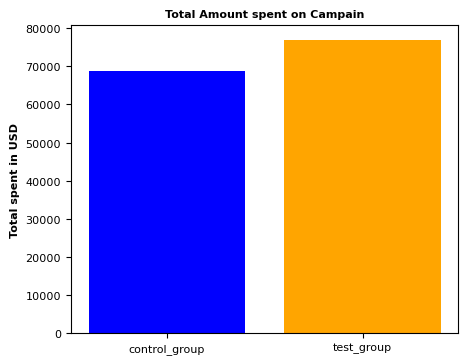

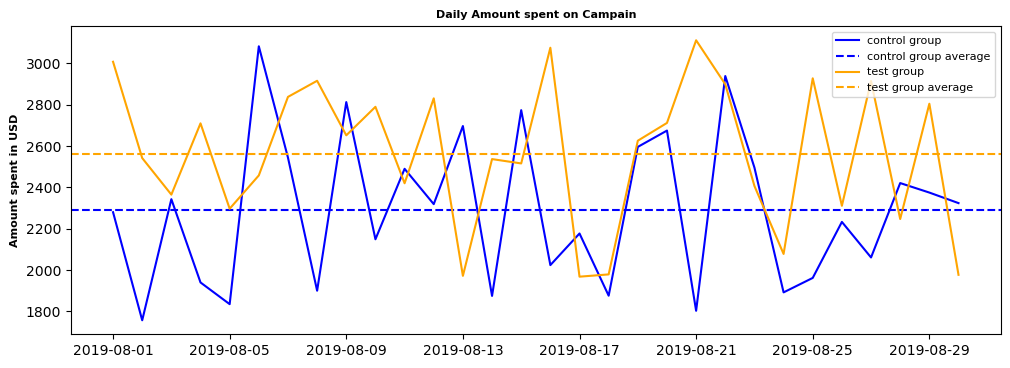

In [23]:
avg_control_group=control_group['Spend [USD]'].mean()
avg_test_group=test_group['Spend [USD]'].mean()

sum_control_group=control_group['Spend [USD]'].sum()
sum_test_group=test_group['Spend [USD]'].sum()

x_spent=['control_group','test_group']
y_spent=[sum_control_group,sum_test_group]

plt.figure(figsize=(5,4))
plt.bar(x=x_spent,
        height=y_spent, color=['blue','orange'])
plt.ylabel('Total spent in USD',fontsize=8,weight='bold')
plt.title('Total Amount spent on Campain', fontsize=8,weight='bold')
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(control_group['Date'],control_group['Spend [USD]'],color='blue',label='control group')
plt.axhline(y=avg_control_group,color='blue',ls='--',label='control group average')
plt.plot(test_group['Date'],test_group['Spend [USD]'],color='orange',label='test group')
plt.axhline(y=avg_test_group,color='orange',ls='--',label='test group average')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily Amount spent on Campain',fontsize=8,weight='bold')
plt.ylabel('Amount spent in USD',fontsize=8,weight='bold')



Daily amount spent on the campaign is the money the marketing company invests on the advertising campaign on a daily basis.

Daily amount spent on the test group campaign is around 10% higher than that on the control campaign. This difference is reflected in the plot showing the total amount spent on the test and control group campaigns.

The impression is the event when a user sees an advertisement. An impression occurs any time a user opens an app and an ad is visible.

Text(0, 0.5, '# of impresions')

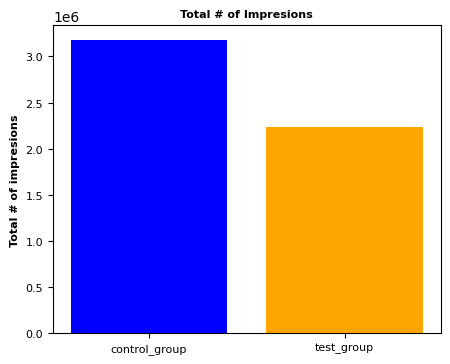

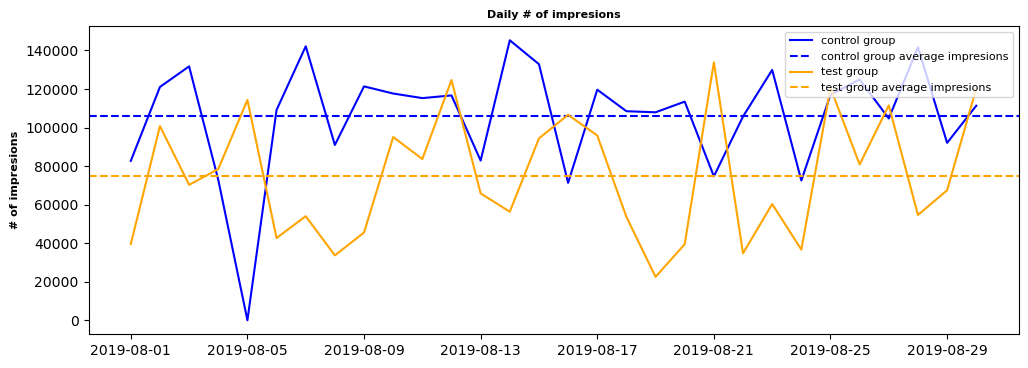

In [25]:
avg_impresion_control_group=control_group['# of Impressions'].mean()
avg_impresion_test_group=test_group['# of Impressions'].mean()

sum_impresions_control_group=control_group['# of Impressions'].sum()
sum_impresion_test_group=test_group['# of Impressions'].sum()

x_impresion=['control_group','test_group']
y_impresion=[sum_impresions_control_group,sum_impresion_test_group]

plt.figure(figsize=(5,4))
plt.bar(x=x_impresion,
        height=y_impresion, color=['blue','orange'])
plt.ylabel('Total # of impresions',fontsize=8,weight='bold')
plt.title('Total # of Impresions', fontsize=8,weight='bold')
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(control_group['Date'],control_group['# of Impressions'],color='blue',label='control group')
plt.axhline(y=avg_impresion_control_group,color='blue',ls='--',label='control group average impresions')
plt.plot(test_group['Date'],test_group['# of Impressions'],color='orange',label='test group')
plt.axhline(y=avg_impresion_test_group,color='orange',ls='--',label='test group average impresions')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily # of impresions',fontsize=8,weight='bold')
plt.ylabel('# of impresions',fontsize=8,weight='bold')

The control group had around 30% more impressions, despite the fact that the total amount spent on the test campaign was higher than that on the control one. 

Text(0, 0.5, '# of Purchase')

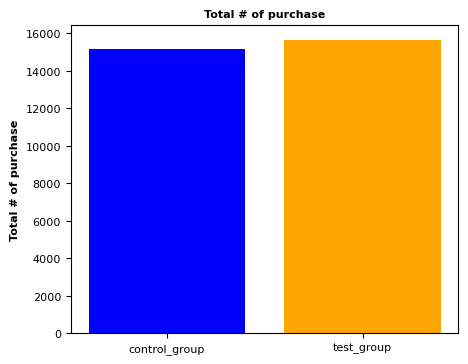

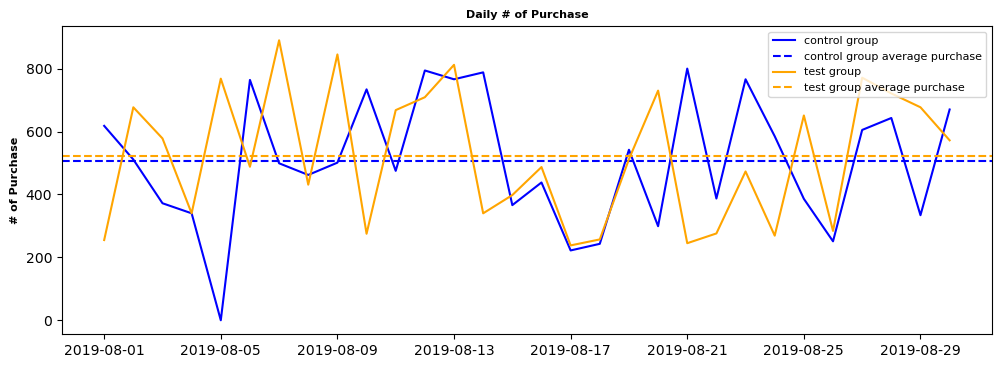

In [26]:
avg_purchase_control_group=control_group['# of Purchase'].mean()
avg_purchase_test_group=test_group['# of Purchase'].mean()

sum_purchase_control_group=control_group['# of Purchase'].sum()
sum_purchase_test_group=test_group['# of Purchase'].sum()

x_purchase=['control_group','test_group']
y_purchase=[sum_purchase_control_group,sum_purchase_test_group]

plt.figure(figsize=(5,4))
plt.bar(x=x_purchase,
        height=y_purchase, color=['blue','orange'])
plt.ylabel('Total # of purchase',fontsize=8,weight='bold')
plt.title('Total # of purchase', fontsize=8,weight='bold')
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(control_group['Date'],control_group['# of Purchase'],color='blue',label='control group')
plt.axhline(y=avg_purchase_control_group,color='blue',ls='--',label='control group average purchase')
plt.plot(test_group['Date'],test_group['# of Purchase'],color='orange',label='test group')
plt.axhline(y=avg_purchase_test_group,color='orange',ls='--',label='test group average purchase')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily # of Purchase',fontsize=8,weight='bold')
plt.ylabel('# of Purchase',fontsize=8,weight='bold')

The number of purchases in the control and test groups are very similar. The customers belonging to the two groups spent around the same amount of money.

In [27]:
boxplot_control_group=control_group.drop(['Campaign Name','Date'],axis=1)
boxplot_control_group.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,2280,82702,56930,7016,2290,2159,1819,618
1,1757,121040,102513,8110,2033,1841,1219,511
2,2343,131711,110862,6508,1737,1549,1134,372
3,1940,72878,61235,3065,1042,982,1183,340
4,1835,0,0,0,0,0,0,0


We will use box plot to see is there outliers in dataset. 
We will use IQR-Interquartile Range method to remove them from the two datasets.

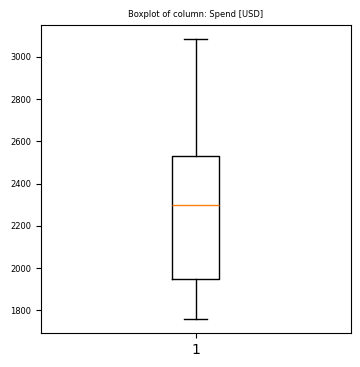

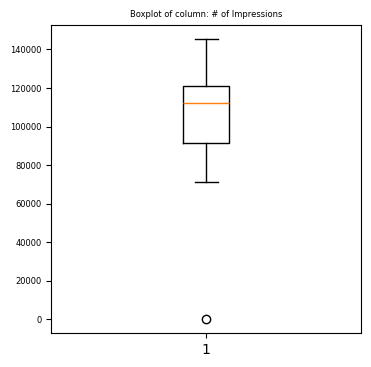

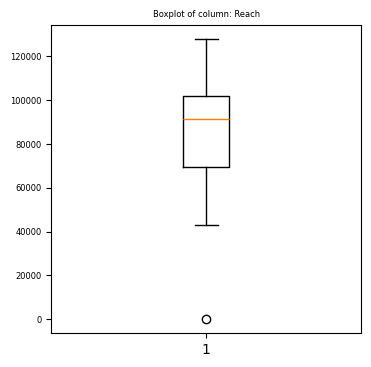

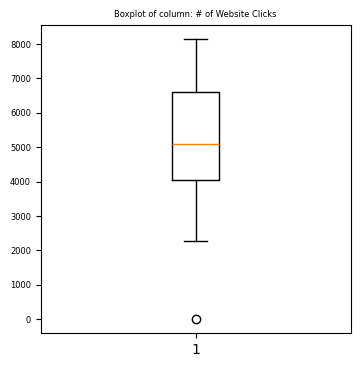

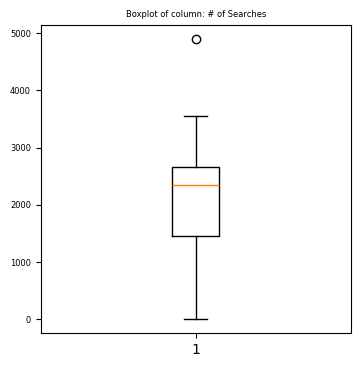

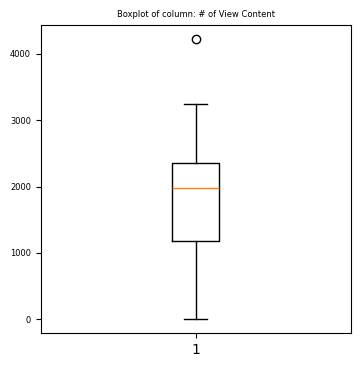

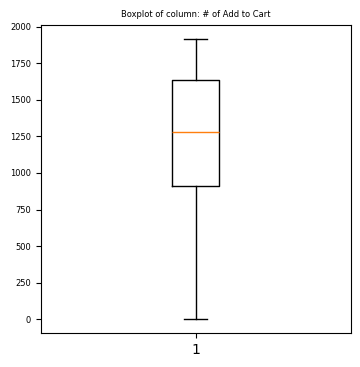

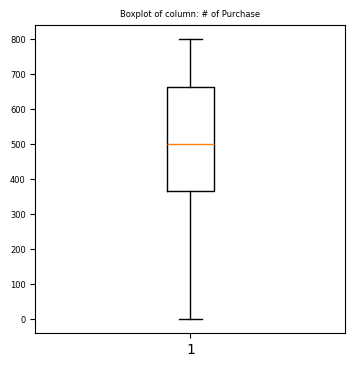

In [28]:
for column in boxplot_control_group.columns:
    plt.figure(figsize=(4,4))
    plt.boxplot(boxplot_control_group[column])
    plt.title(f'Boxplot of column: {column}',fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()
    

In [29]:
def outlier_percentige(data):
    lista=[]

    for column,value in data.items():
        if data[column].dtype != 'O':
            q1=value.quantile(0.25)
            q3=value.quantile(0.75)
            iqr=q3-q1
            value_column=value[(value<=q1-1.5*iqr) | (value>=q3+1.5*iqr)]
            perc = np.shape(value_column)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (column,int(perc))
            lista.append(out_tuple)
            print("Column %s outliers = %.2f%%" % (column,perc))
    

In [30]:
outlier_percentige(control_group)

Column Date outliers = 0.00%
Column Spend [USD] outliers = 0.00%
Column # of Impressions outliers = 3.33%
Column Reach outliers = 3.33%
Column # of Website Clicks outliers = 3.33%
Column # of Searches outliers = 3.33%
Column # of View Content outliers = 3.33%
Column # of Add to Cart outliers = 0.00%
Column # of Purchase outliers = 0.00%


In [31]:
def remove_outliers(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    filtered_data=data[(data[column]>=lower) & (data[column]<=upper)]
    return filtered_data
    

In [32]:
control_group_copy=control_group.copy()
test_group_copy=test_group.copy()
box_control_group_copy=control_group_copy.drop(['Campaign Name','Date'],axis=1)
box_test_group_copy=test_group_copy.drop(['Campaign Name','Date'],axis=1)

In [33]:
box_control_group_copy.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,2280,82702,56930,7016,2290,2159,1819,618
1,1757,121040,102513,8110,2033,1841,1219,511
2,2343,131711,110862,6508,1737,1549,1134,372
3,1940,72878,61235,3065,1042,982,1183,340
4,1835,0,0,0,0,0,0,0


In [34]:
for column in box_control_group_copy:
    box_control_group_copy=remove_outliers(box_control_group_copy,column)
    

In [35]:
box_control_group_copy.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,2280,82702,56930,7016,2290,2159,1819,618
1,1757,121040,102513,8110,2033,1841,1219,511
2,2343,131711,110862,6508,1737,1549,1134,372
3,1940,72878,61235,3065,1042,982,1183,340
5,3083,109076,87998,4028,1709,1249,784,764


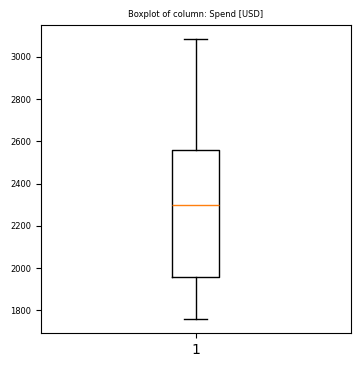

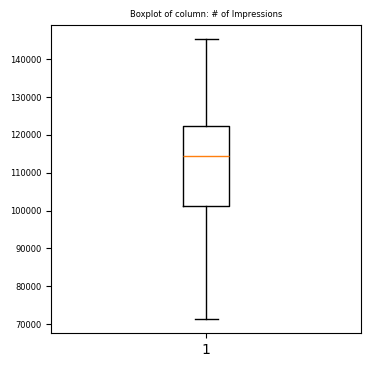

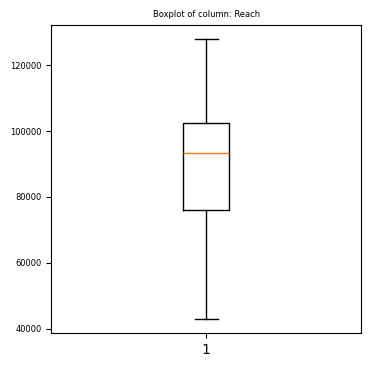

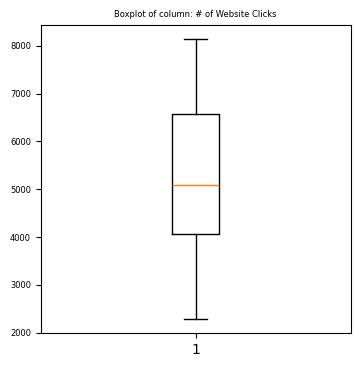

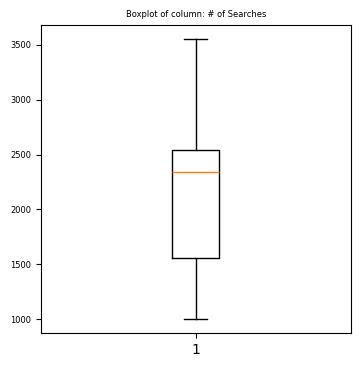

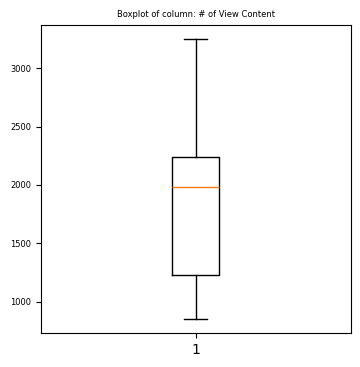

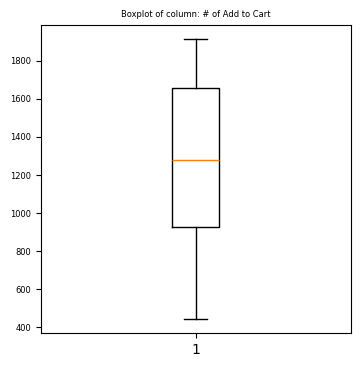

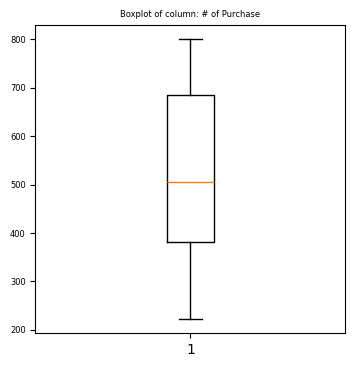

In [36]:
for column in box_control_group_copy.columns:
    plt.figure(figsize=(4,4))
    plt.boxplot(box_control_group_copy[column])
    plt.title(f'Boxplot of column: {column}',fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()

In [37]:
for column in box_test_group_copy:
    box_test_group_copy=remove_outliers(box_test_group_copy,column)
    

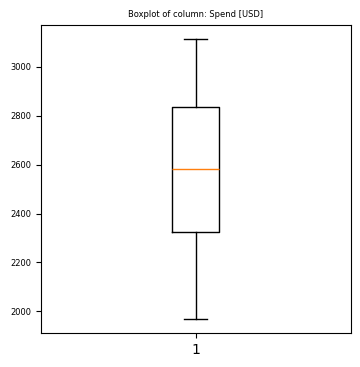

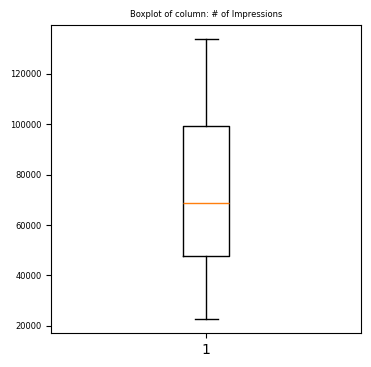

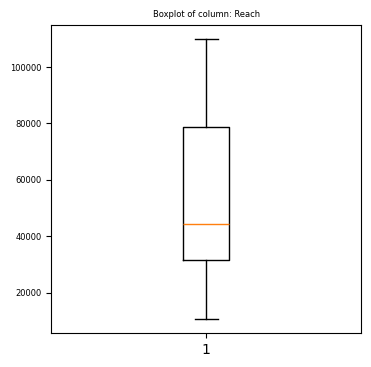

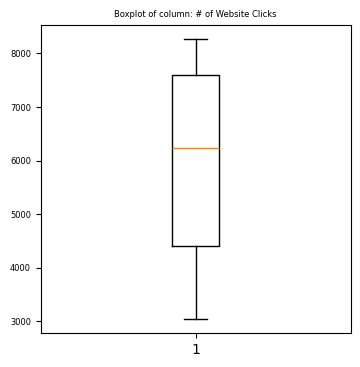

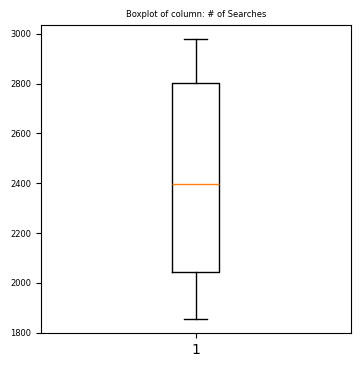

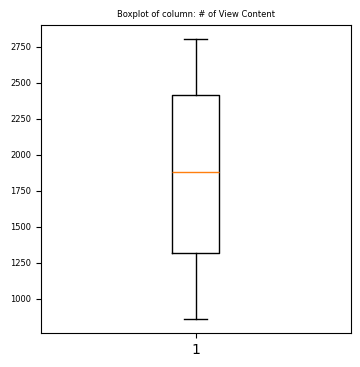

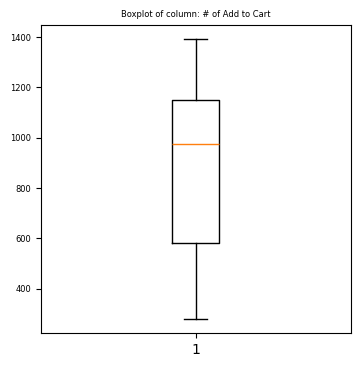

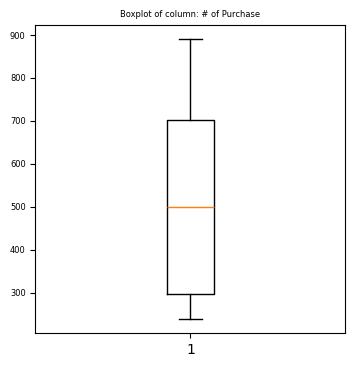

In [38]:
for column in box_test_group_copy.columns:
    plt.figure(figsize=(4,4))
    plt.boxplot(box_test_group_copy[column])
    plt.title(f'Boxplot of column: {column}',fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()

Below we are comparing the distributions of the control group variables with and without the outliers.

Text(0.5, 1.0, 'Distribution of spent USD')

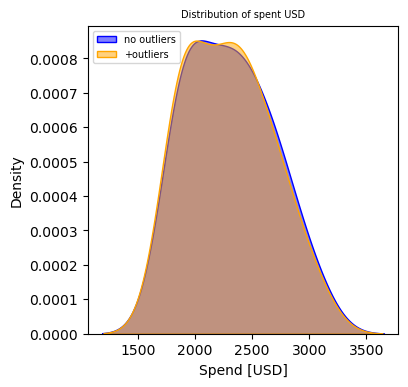

In [39]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['Spend [USD]'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['Spend [USD]'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution of spent USD',fontsize=7)


Text(0.5, 1.0, 'Distribution # of Impressions')

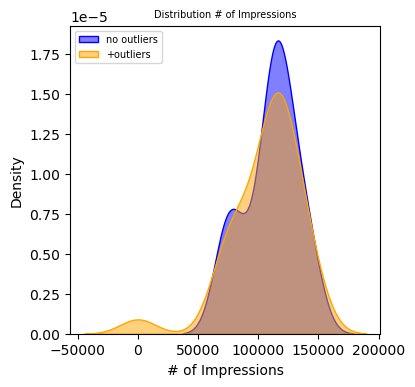

In [40]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['# of Impressions'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['# of Impressions'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution # of Impressions',fontsize=7)


Text(0.5, 1.0, 'Distribution of Reach')

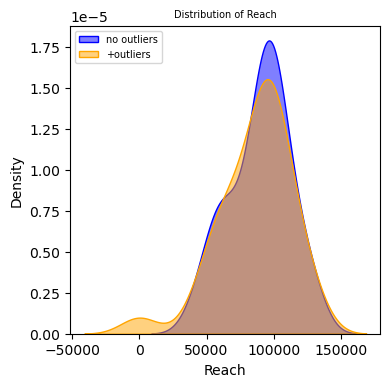

In [41]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['Reach'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['Reach'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution of Reach',fontsize=7)

Text(0.5, 1.0, 'Distribution # of Website Clicks')

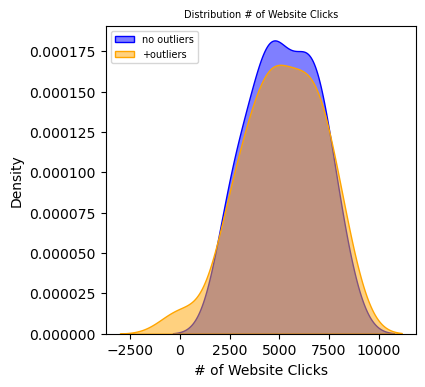

In [42]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['# of Website Clicks'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['# of Website Clicks'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution # of Website Clicks',fontsize=7)

Text(0.5, 1.0, 'Distribution # of Searches')

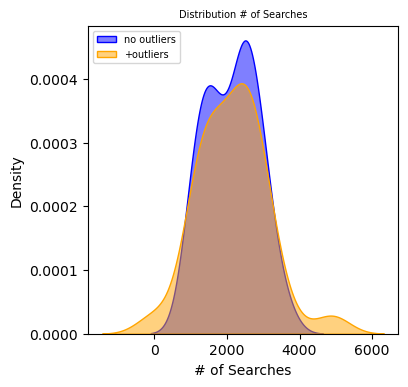

In [43]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['# of Searches'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['# of Searches'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution # of Searches',fontsize=7)

Text(0.5, 1.0, 'Distribution # of View Content')

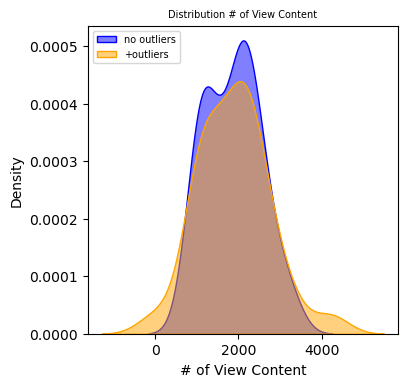

In [44]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['# of View Content'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['# of View Content'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution # of View Content',fontsize=7)

Text(0.5, 1.0, 'Distribution # of Add to Cart')

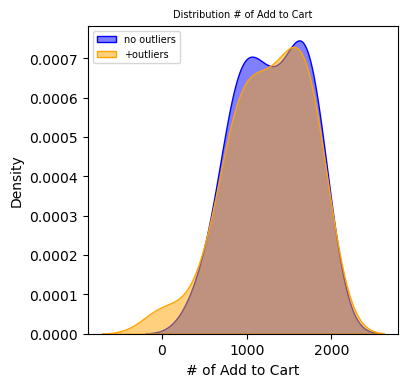

In [45]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['# of Add to Cart'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['# of Add to Cart'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution # of Add to Cart',fontsize=7)

Text(0.5, 1.0, 'Distribution # of Purchase')

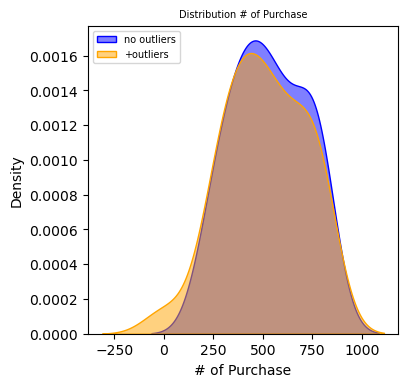

In [46]:
plt.figure(figsize=(4, 4))
sns.kdeplot(data=box_control_group_copy['# of Purchase'], label='no outliers', fill=True, color='blue', alpha=0.5)
sns.kdeplot(data=boxplot_control_group['# of Purchase'], label='+outliers', fill=True, color='orange', alpha=0.5)
plt.legend(loc='upper left',fontsize=7)
plt.title('Distribution # of Purchase',fontsize=7)

We will make some metrics which will help us to determine whether the campaign was successful or not.
The conversion rate measures the fraction of visitors that completed a desired action (making a purchase) out of the total number of visitors. It is defined as the ratio between purchases and website clicks.
Cost per click variable is defined as ration between spent money and website clicks.
Cost per Purchese is defined as ratio between spent money and no.of purchese.
Click trough rate variable is defined as ratio between no.of clicks and no.of impressions.

In [47]:
box_control_group_copy['Conversion Rate']=box_control_group_copy['# of Purchase']/box_control_group_copy['# of Website Clicks']
box_test_group_copy['Conversion Rate']=box_test_group_copy['# of Purchase']/box_test_group_copy['# of Website Clicks']

box_control_group_copy['Cost per Click']=box_control_group_copy['Spend [USD]']/box_control_group_copy['# of Website Clicks']
box_test_group_copy['Cost per Click']=box_test_group_copy['Spend [USD]']/box_test_group_copy['# of Website Clicks']

box_control_group_copy['Cost per Purchase']=box_control_group_copy['Spend [USD]']/box_control_group_copy['# of Purchase']
box_test_group_copy['Cost per Purchase']=box_test_group_copy['Spend [USD]']/box_test_group_copy['# of Purchase']

box_control_group_copy['Click trough Rate']=box_control_group_copy['# of Website Clicks']/box_control_group_copy['# of Impressions']
box_test_group_copy['Click trough Rate']=box_test_group_copy['# of Website Clicks']/box_test_group_copy['# of Impressions']


In [48]:
box_control_group_copy.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Conversion Rate,Cost per Click,Cost per Purchase,Click trough Rate
0,2280,82702,56930,7016,2290,2159,1819,618,0.088084,0.324971,3.689320,0.084835
1,1757,121040,102513,8110,2033,1841,1219,511,0.063009,0.216646,3.438356,0.067003
2,2343,131711,110862,6508,1737,1549,1134,372,0.057160,0.360018,6.298387,0.049411
3,1940,72878,61235,3065,1042,982,1183,340,0.110930,0.632953,5.705882,0.042057
5,3083,109076,87998,4028,1709,1249,784,764,0.189672,0.765392,4.035340,0.036928


In [49]:
box_test_group_copy.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Conversion Rate,Cost per Click,Cost per Purchase,Click trough Rate
0,3008,39550,35820,3038,1946,1069,894,255,0.083937,0.990125,11.796078,0.076814
1,2542,100719,91236,4657,2359,1548,879,677,0.145373,0.545845,3.754801,0.046238
2,2365,70263,45198,7885,2572,2367,1268,578,0.073304,0.299937,4.091696,0.112221
3,2710,78451,25937,4216,2216,1437,566,340,0.080645,0.642789,7.970588,0.053741
4,2297,114295,95138,5863,2106,858,956,768,0.130991,0.391779,2.990885,0.051297


We want to check distribution of created metric variables. We will use histogram and Q-Q Plot. We see that metrics don't have normal distribution.

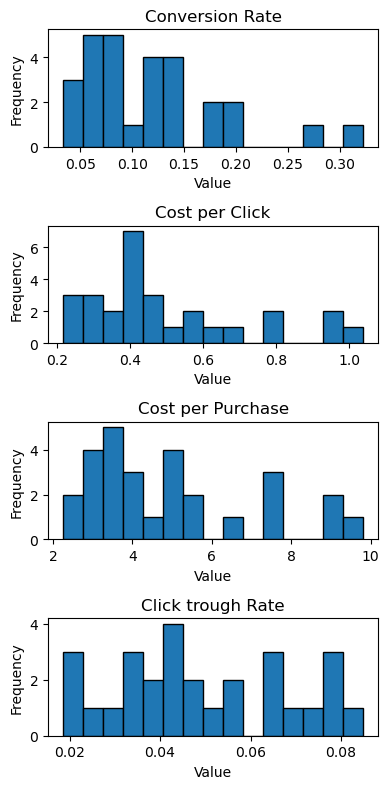

In [50]:

# fig,axes=plt.subplots(4,1,figsize=(5,5))
# plt.hist(box_control_group_copy['Conversion Rate'],bins=15,ax=axes[0],title='Conversion Rate')
# plt.hist(box_control_group_copy['Cost per Click'],bins=15,ax=axes[1],title='Cost per Click')
# plt.hist(box_control_group_copy['Cost per Purchase'],bins=15,ax=axes[2],title='Cost per Purchase')
# plt.hist(box_control_group_copy['Click trough Rate'],bins=15,ax=axes[3],title='Click trough Rate')


fig, axes = plt.subplots(4, 1, figsize=(4,8))  # 4 rows, 1 column

metrics = ['Conversion Rate', 'Cost per Click', 'Cost per Purchase', 'Click trough Rate']

for i, m in enumerate(metrics):
    axes[i].hist(box_control_group_copy[m], bins=15, edgecolor='black')  
    axes[i].set_title(m)  # Set the title of each subplot
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  
plt.show()


In [51]:
for i,m in enumerate(metrics):
    print (i,m)

0 Conversion Rate
1 Cost per Click
2 Cost per Purchase
3 Click trough Rate


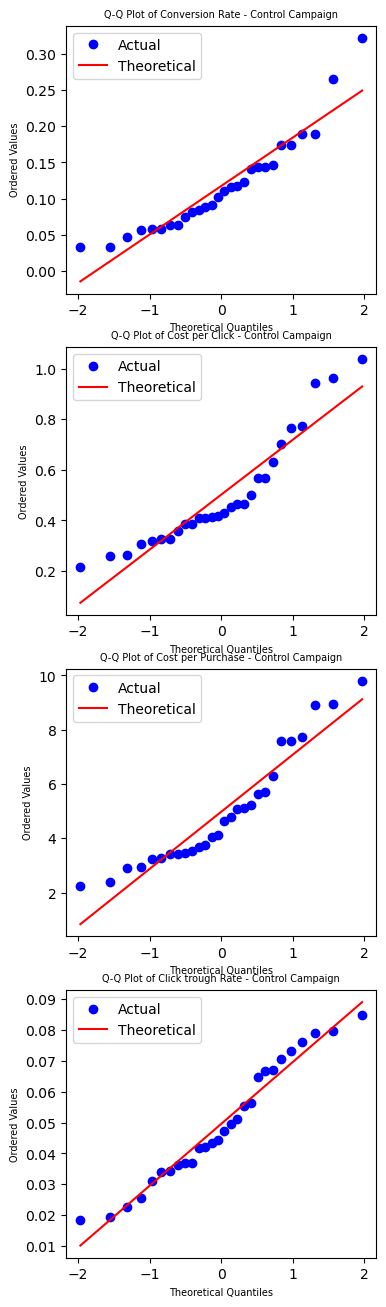

In [52]:
metrics = ['Conversion Rate', 'Cost per Click', 'Cost per Purchase', 'Click trough Rate']

fig, axes = plt.subplots(nrows=len(metrics), figsize=(4,4 * len(metrics)))

for i, m in enumerate(metrics):
    stats.probplot(box_control_group_copy[m], dist="norm", plot=axes[i])  # Use axes[i] instead of plt

    axes[i].legend(['Actual', 'Theoretical'])  # Fix syntax
    axes[i].set_xlabel("Theoretical Quantiles", fontsize=7)  # Fix syntax
    axes[i].set_ylabel("Ordered Values", fontsize=7)  # Fix syntax
    axes[i].set_title(f"Q-Q Plot of {m} - Control Campaign", fontsize=7)  # Use `m` instead of `metric`

In [53]:
box_control_group_copy = pd.merge(box_control_group_copy, control_group[['Date']], left_index=True, right_index=True, how='left')
box_control_group_copy.head(1)

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Conversion Rate,Cost per Click,Cost per Purchase,Click trough Rate,Date
0,2280,82702,56930,7016,2290,2159,1819,618,0.088084,0.324971,3.68932,0.084835,2019-08-01


In [54]:
box_test_group_copy = pd.merge(box_test_group_copy, test_group[['Date']], left_index=True, right_index=True, how='left')
box_test_group_copy.head(1)

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Conversion Rate,Cost per Click,Cost per Purchase,Click trough Rate,Date
0,3008,39550,35820,3038,1946,1069,894,255,0.083937,0.990125,11.796078,0.076814,2019-08-01


We will compare the daily and the (global) average values of the metrics on the test and control groups.

Text(0, 0.5, 'Conversion rate')

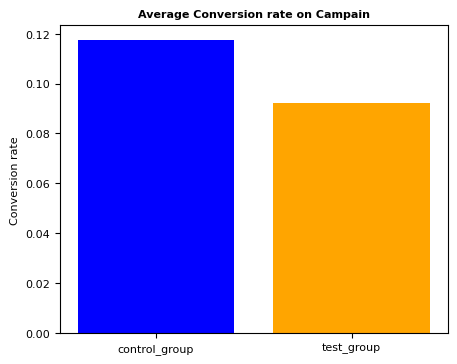

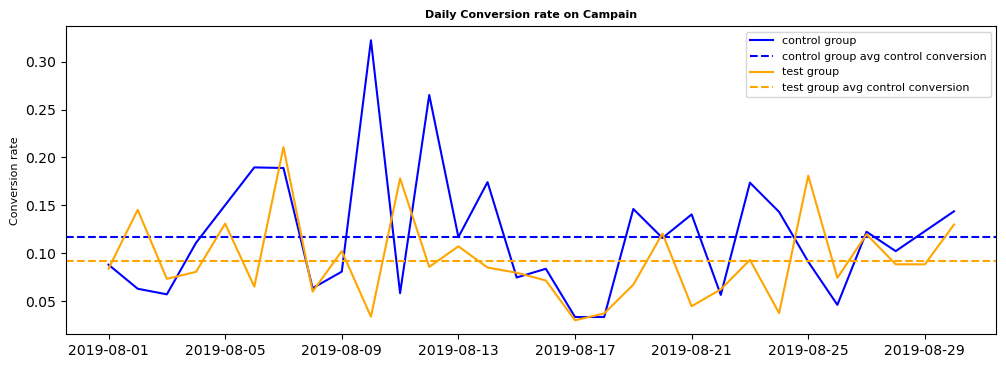

In [62]:
avg_control_conversion_rate=box_control_group_copy['Conversion Rate'].mean()
avg_test_conversion_rate=box_test_group_copy['Conversion Rate'].mean()

x_conversion_rate=['control_group','test_group']
y_conversion_rate=[avg_control_conversion_rate,avg_test_conversion_rate]

plt.figure(figsize=(5,4))
plt.bar(x=x_conversion_rate,
        height=y_conversion_rate, color=['blue','orange'])
plt.ylabel('Conversion rate',fontsize=8)
plt.title('Average Conversion rate on Campain', fontsize=8,weight='bold')
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(box_control_group_copy['Date'],box_control_group_copy['Conversion Rate'],color='blue',label='control group')
plt.axhline(y=avg_control_conversion_rate,color='blue',ls='--',label='control group avg control conversion')
plt.plot(box_test_group_copy['Date'],box_test_group_copy['Conversion Rate'],color='orange',label='test group')
plt.axhline(y=avg_test_conversion_rate,color='orange',ls='--',label='test group avg control conversion')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily Conversion rate on Campain',fontsize=8,weight='bold')
plt.ylabel('Conversion rate',fontsize=8)

Text(0, 0.5, 'Cost per Click')

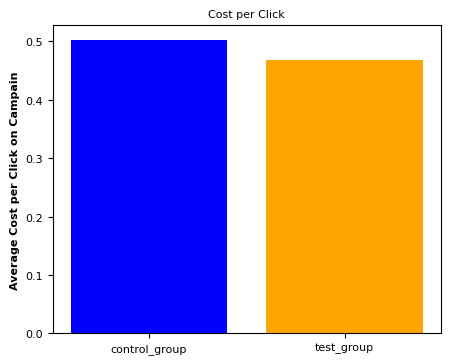

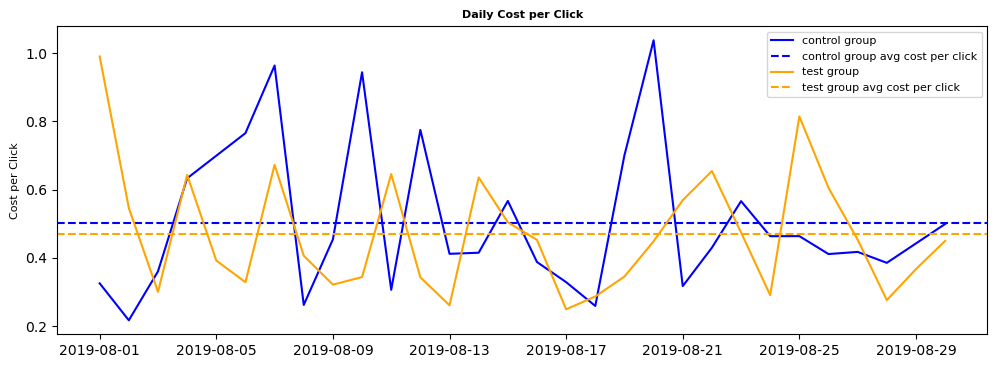

In [56]:
avg_control_cost_per_click=box_control_group_copy['Cost per Click'].mean()
avg_test_cost_per_click=box_test_group_copy['Cost per Click'].mean()

x_cost_per_click=['control_group','test_group']
y_cost_per_click=[avg_control_cost_per_click,avg_test_cost_per_click]

plt.figure(figsize=(5,4))
plt.bar(x=x_cost_per_click,
        height=y_cost_per_click, color=['blue','orange'])
plt.ylabel('Average Cost per Click on Campain',fontsize=8,weight='bold')
plt.title('Cost per Click', fontsize=8)
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(box_control_group_copy['Date'],box_control_group_copy['Cost per Click'],color='blue',label='control group')
plt.axhline(y=avg_control_cost_per_click,color='blue',ls='--',label='control group avg cost per click')
plt.plot(box_test_group_copy['Date'],box_test_group_copy['Cost per Click'],color='orange',label='test group')
plt.axhline(y=avg_test_cost_per_click,color='orange',ls='--',label='test group avg cost per click')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily Cost per Click',fontsize=8,weight='bold')
plt.ylabel('Cost per Click',fontsize=8)

Text(0, 0.5, 'Cost per Purchase')

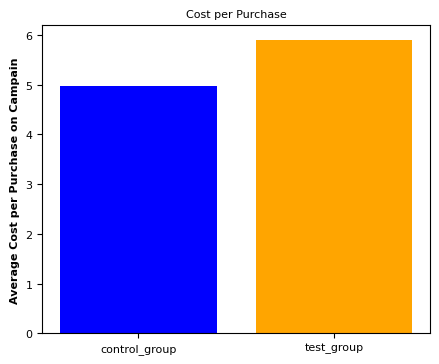

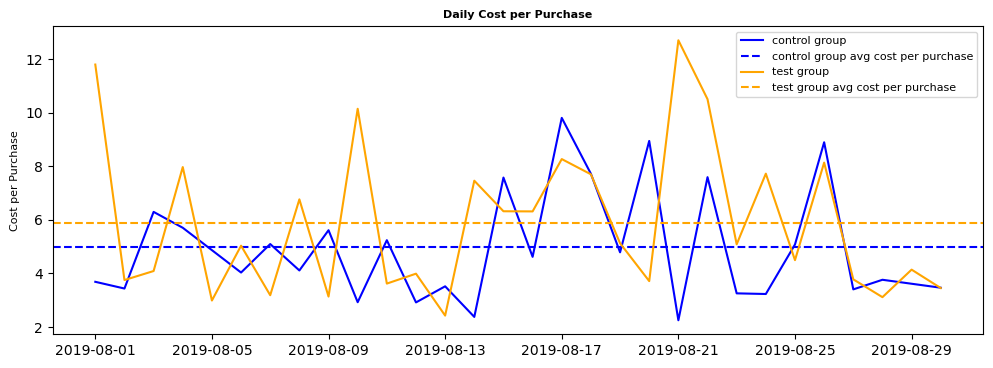

In [57]:
avg_control_cost_per_purchase=box_control_group_copy['Cost per Purchase'].mean()
avg_test_cost_per_purchase=box_test_group_copy['Cost per Purchase'].mean()

x_cost_per_purchase=['control_group','test_group']
y_cost_per_purchase=[avg_control_cost_per_purchase,avg_test_cost_per_purchase]

plt.figure(figsize=(5,4))
plt.bar(x=x_cost_per_purchase,
        height=y_cost_per_purchase, color=['blue','orange'])
plt.ylabel('Average Cost per Purchase on Campain',fontsize=8,weight='bold')
plt.title('Cost per Purchase', fontsize=8)
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(box_control_group_copy['Date'],box_control_group_copy['Cost per Purchase'],color='blue',label='control group')
plt.axhline(y=avg_control_cost_per_purchase,color='blue',ls='--',label='control group avg cost per purchase')
plt.plot(box_test_group_copy['Date'],box_test_group_copy['Cost per Purchase'],color='orange',label='test group')
plt.axhline(y=avg_test_cost_per_purchase,color='orange',ls='--',label='test group avg cost per purchase')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily Cost per Purchase',fontsize=8,weight='bold')
plt.ylabel('Cost per Purchase',fontsize=8)

Text(0, 0.5, 'Click trough Rate')

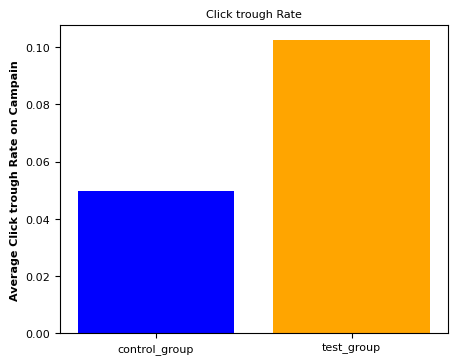

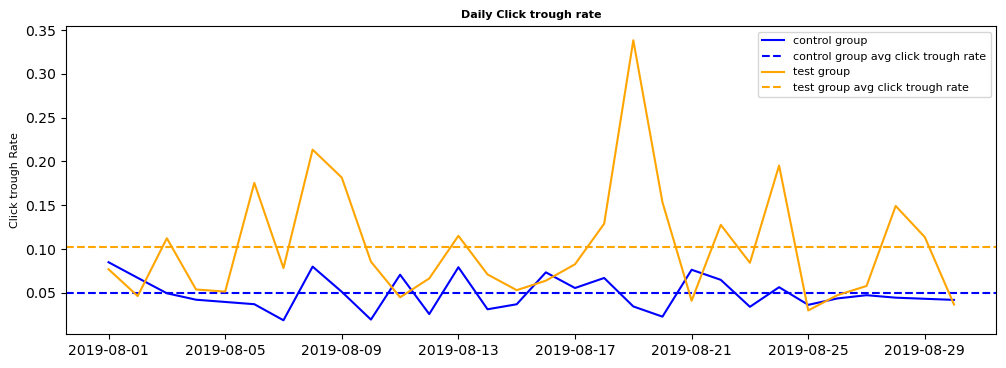

In [58]:
avg_control_click_trough_rate=box_control_group_copy['Click trough Rate'].mean()
avg_test_click_trough_rate=box_test_group_copy['Click trough Rate'].mean()

x_click_trough_rate=['control_group','test_group']
y_click_trough_rate=[avg_control_click_trough_rate,avg_test_click_trough_rate]

plt.figure(figsize=(5,4))
plt.bar(x=x_click_trough_rate,
        height=y_click_trough_rate, color=['blue','orange'])
plt.ylabel('Average Click trough Rate on Campain',fontsize=8,weight='bold')
plt.title('Click trough Rate', fontsize=8)
plt.xticks(fontsize=8,)
plt.yticks(fontsize=8)
plt.show

plt.figure(figsize=(12,4))
plt.plot(box_control_group_copy['Date'],box_control_group_copy['Click trough Rate'],color='blue',label='control group')
plt.axhline(y=avg_control_click_trough_rate,color='blue',ls='--',label='control group avg click trough rate')
plt.plot(box_test_group_copy['Date'],box_test_group_copy['Click trough Rate'],color='orange',label='test group')
plt.axhline(y=avg_test_click_trough_rate,color='orange',ls='--',label='test group avg click trough rate')
plt.legend(fontsize=8, loc='upper right')
plt.title('Daily Click trough rate',fontsize=8,weight='bold')
plt.ylabel('Click trough Rate',fontsize=8)

The difference between the average values of the metrics on the test and control groups is small in the cost per click case.
The difference between the average values of the metrics on the test and control groups is relatively small or medium in the conversion rate and average cost per purchase cases.
The difference is large in the click-through rate case.

We will perform T-test and test for non-Normal Distributed Variables (Mann-Whitney U test).
This is the non-parametric equivalent of the parametric t-test. It does not make any assumptions about normality and works well with small samples.

In [59]:
for metric in metrics:

    print(f'\n{metric}:')
    t_stat, p_value = stats.ttest_ind(box_control_group_copy[metric], box_test_group_copy[metric])
    print(f"T-statistic: {t_stat}, P-value: {p_value}")



Conversion Rate:
T-statistic: 1.6717099553710586, P-value: 0.10016095191704834

Cost per Click:
T-statistic: 0.6346799573036067, P-value: 0.52822174114737

Cost per Purchase:
T-statistic: -1.40447638039896, P-value: 0.1656994520649338

Click trough Rate:
T-statistic: -3.9722861929198148, P-value: 0.00020545736559049224


In [60]:
for metric in metrics:

    print(f'\n{metric}:')
    print(stats.mannwhitneyu(box_control_group_copy[metric], box_test_group_copy[metric]))


Conversion Rate:
MannwhitneyuResult(statistic=499.0, pvalue=0.22189553147773622)

Cost per Click:
MannwhitneyuResult(statistic=445.0, pvalue=0.7030299918355747)

Cost per Purchase:
MannwhitneyuResult(statistic=342.0, pvalue=0.22783958084713474)

Click trough Rate:
MannwhitneyuResult(statistic=175.0, pvalue=0.00014205949265144692)


The difference in conversion rates between the control and test groups IS NOT statistically significant.
The difference in cost per click between the control and test groups IS NOT statistically significant.
The difference in cost per purchase between the control and test groups IS NOT statistically significant.
The difference in click-trough rates between the control and test groups IS statistically significant.

We can conclude that the test campaign advertisement does not have a significant impact on conversion rate, cost per click and cost per purchase. Therefore, there is no evident and clear advantage in the new (test) campaign.